<a href="https://colab.research.google.com/github/PavelStelmakhV/hw303-data-visualization/blob/main/sierpinski_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

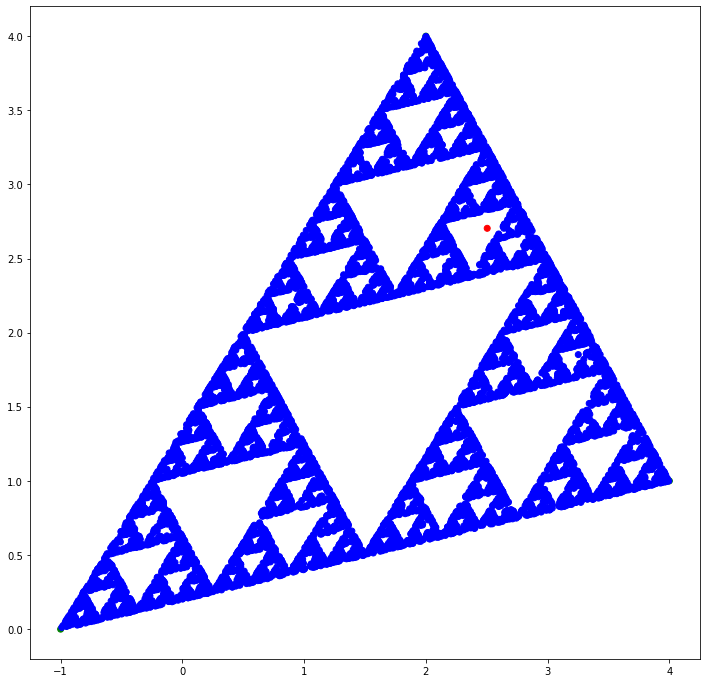

In [19]:
import numpy as np
import matplotlib.pyplot as plt


ITERATION = 10000


def point_in_triangle(point, a, b, c):
  p = np.cross(a-point, b-a)
  q = np.cross(b-point, c-b)
  r = np.cross(c-point, a-c)
  if (p < 0 and q < 0 and r < 0) or (p > 0 and q > 0 and r > 0):
    return True
  return False


def random_point(points):
  rng = np.random.default_rng()
  point = np.zeros((2, ), dtype=float)
  while True:
    point[0] = rng.random() * (points[:, 0].max() - points[:, 0].min()) + points[:, 0].min()
    point[1] = rng.random() * (points[:, 1].max() - points[:, 1].min()) + points[:, 1].min()
    if point_in_triangle(point, points[0], points[1], points[2]):
      return point


def middle_point(p1, p2):
  return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2]


points = np.zeros((ITERATION + 3, 2), dtype=float)
points[0] = [-1, 0]
points[1] = [2, 4]
points[2] = [4, 1]
points[3] = random_point(points[:3])

rng = np.random.default_rng()
for num_point in range(ITERATION-1):
  apex = points[rng.integers(low=0, high=2, endpoint = True)]
  points[4 + num_point] = middle_point(points[3 + num_point], apex)

color = ['g'] * 3 + ['r'] + ['b'] * (ITERATION-1)
%matplotlib inline
plt.figure(figsize = (12,12))
plt.scatter(points[:, 0], points[:, 1], linewidths=1, c=color)
plt.show()
